# Boids

## Pre-commit checklist

- [ ] Restart kernel and run all cells
- [ ] Clear all output and save the notebook
- [ ] Run '!nbqa flake8 boids.ipynb'

In [4]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from matplotlib import pyplot as plt

!nbqa flake8 boids.ipynb
print("hello world")

boids.ipynb:cell_3:1:1: E402 module level import not at top of file
boids.ipynb:cell_3:2:1: E402 module level import not at top of file
boids.ipynb:cell_3:3:1: E402 module level import not at top of file
boids.ipynb:cell_3:4:1: E402 module level import not at top of file
boids.ipynb:cell_5:4:13: F821 undefined name 'generate_boid_attributes'
boids.ipynb:cell_6:4:14: F821 undefined name 'generate_boid_attributes'
hello world


In [5]:
def generate_boid_attributes(lower, upper, n=10):
    width = upper - lower
    attributes = np.random.random_sample(size=(2, n)) * width[:, np.newaxis]
    attributes += lower[:, np.newaxis]
    return attributes


expected = (2, 10)
actual = generate_boid_attributes(np.array([0, 0]), np.array([1, 1])).shape
assert expected == actual

In [6]:
lower_p = np.array([150, 300])  # x-lower, y-lower
upper_p = np.array([200, 400])  # x-upper, y-upp

positions = generate_boid_attributes(lower_p, upper_p)
positions

array([[154.95769131, 158.42308942, 199.19067766, 181.4915502 ,
        194.7192618 , 156.08321902, 198.7521293 , 176.48692191,
        171.41265892, 198.81410949],
       [307.58241932, 344.5913233 , 382.42981331, 302.5098084 ,
        326.96956096, 314.66509769, 305.57150956, 334.25666727,
        398.71329732, 352.73650185]])

In [7]:
lower_v = np.array([5, -10])  # x-lower, y-lower
upper_v = np.array([15, 5])  # x-upper, y-upp

velocities = generate_boid_attributes(lower_v, upper_v)
velocities

array([[ 9.64759822,  5.550692  , 13.39288132,  7.99731946,  8.80586911,
        13.54013268,  5.63297954,  8.23654244,  6.81196992, 12.64880615],
       [-5.77202866, -4.28001279,  4.36653767, -0.80335454, -0.77998086,
         4.51904458, -6.90400588, -2.69689799,  4.4931585 ,  3.15435622]])

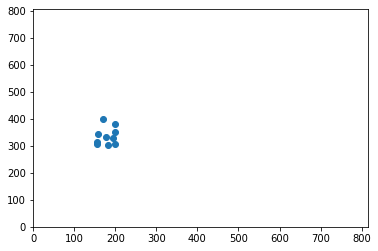

In [8]:
plt.xlim(0, 4 * upper_p[0] + upper_v[0])
plt.ylim(0, 2 * upper_p[1] + upper_v[1])

scatter = plt.scatter(positions[0, :], positions[1:])

In [9]:
def update_boids(positions, velocities):
    """Updates the boid positions."""
    positions += velocities


def animate(frame):
    """Updates the scatter plot."""
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [10]:
anim = animation.FuncAnimation(scatter.figure, animate, frames=50, interval=50)

HTML(anim.to_jshtml())

In [11]:
positions

array([[646.98520075, 441.50838131, 882.22762497, 589.35484241,
        643.81858658, 846.6299855 , 486.03408567, 596.55058656,
        518.8231247 , 843.90322323],
       [ 13.20895787, 126.31067084, 605.12323431, 261.53872679,
        287.19053687, 545.13637135, -46.53279041, 196.71486984,
        627.86438089, 513.60866926]])

In [12]:
!nbqa flake8 boids.ipynb

boids.ipynb:cell_3:1:1: E402 module level import not at top of file
boids.ipynb:cell_3:2:1: E402 module level import not at top of file
boids.ipynb:cell_3:3:1: E402 module level import not at top of file
boids.ipynb:cell_3:4:1: E402 module level import not at top of file
boids.ipynb:cell_5:4:13: F821 undefined name 'generate_boid_attributes'
boids.ipynb:cell_6:4:14: F821 undefined name 'generate_boid_attributes'
